# IntroStat Week 5: Hypothesis Testing

Welcome to the 5th lecture in IntroStat

During the lectures we will present both slides and notebooks. 

This is the notebook used in the lecture in week 5.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Simulation: Sample from normal distribution

In [2]:
np.random.seed(24) # Seed for reproducibility

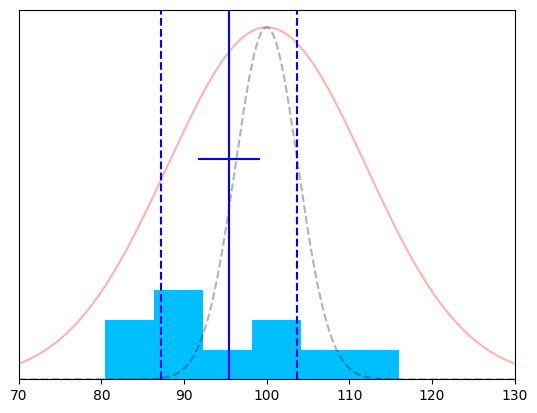

In [3]:
# (repeat this cell many times to see the randomness)
mu = 100
sigma = 12
n = 10
data = stats.norm.rvs(mu, sigma, size=n) # generate the random normal data
x = np.arange(70,130,0.1)
plt.xlim(70,130)
# plot the normal distribution
plt.plot(x, .2*np.sqrt(2*np.pi*sigma**2)*stats.norm.pdf(x, loc=mu, scale=sigma), color="red",alpha=0.3) 
plt.plot(x, .2*np.sqrt(2*np.pi*sigma**2/n)*stats.norm.pdf(x, loc=mu, scale=sigma/np.sqrt(n)), color="black", linestyle='--',alpha=0.3)
# Histogram
plt.hist(data, density=True, color='deepskyblue', bins=6)
plt.axvline(data.mean(), linestyle='-', color="blue", ymin=0, ymax=1) # Mean
plt.plot([data.mean()-data.std(ddof=1)/np.sqrt(n), data.mean()+data.std(ddof=1)/np.sqrt(n)], [0.25/2,0.25/2], linestyle='-', color="blue")
# Confidence interval
plt.axvline(stats.t.ppf(0.025, df=n-1)*data.std(ddof=1)/np.sqrt(n)+data.mean(), linestyle='--', color="blue", ymin=0, ymax=1)
plt.axvline(stats.t.ppf(0.975, df=n-1)*data.std(ddof=1)/np.sqrt(n)+data.mean(), linestyle='--', color="blue", ymin=0, ymax=1)
plt.tick_params(left = False, right = False , labelleft = False) 
plt.show()

### Simulation: ECDF and Q-Q plot

# Creating a Quantile-Quantile (Q-Q) plot step-by-step

Let's walk through the process of creating a Quantile-Quantile (Q-Q) plot step-by-step using the given student height data:

**Student Height Data**:
`x = [168, 161, 167, 179, 184, 166, 198, 187, 191, 179]`

**Goal**:
To manually create a Q-Q plot to understand if the data is normally distributed. Q-Q plots compare the quantiles of the given data (`x`) with the quantiles of a standard normal distribution.

## Step-by-Step Guide for Creating a Q-Q Plot

### Step 1: Organize the Data
First, you need to organize and sort your dataset.


In [4]:
#### Given data
x = [168, 161, 167, 179, 184, 166, 198, 187, 191, 179]

#### Sort the data in ascending order
x_sorted = sorted(x)

#### Print sorted data
print(x_sorted)

[161, 166, 167, 168, 179, 179, 184, 187, 191, 198]


### Step 2: Rank the Data and Calculate Probabilities
Calculate the empirical cumulative distribution function (ECDF) quantiles. Since there are 10 values, we'll calculate each value's rank and the corresponding probabilities:

- $i $ is the rank (starting from 1 to $n $), where $n = 10 $ is the number of observations.
- The empirical probability for each value is calculated as:

  $
  p_i = \frac{i - 0.5}{n}
 $

  So the probabilities for our sorted data are:

  - $p_1 = \frac{1 - 0.5}{10} = 0.05 $
  - $p_2 = \frac{2 - 0.5}{10} = 0.15 $
  - $p_3 = \frac{3 - 0.5}{10} = 0.25 $
  - $p_4 = \frac{4 - 0.5}{10} = 0.35 $
  - $p_5 = \frac{5 - 0.5}{10} = 0.45 $
  - $p_6 = \frac{6 - 0.5}{10} = 0.55 $
  - $p_7 = \frac{7 - 0.5}{10} = 0.65 $
  - $p_8 = \frac{8 - 0.5}{10} = 0.75 $
  - $p_9 = \frac{9 - 0.5}{10} = 0.85 $
  - $p_{10} = \frac{10 - 0.5}{10} = 0.95 $

#### Step 3: Find Theoretical Quantiles
Next, find the theoretical quantiles for a standard normal distribution corresponding to the calculated probabilities. These quantiles are called the "theoretical quantiles".

You can use the inverse of the cumulative distribution function (CDF), also known as the quantile function, to find these values. In the context of the standard normal distribution, this is often done using the Z-table or a Python function like `scipy.stats.norm.ppf()`:

- Theoretical Quantiles ($q_i $) = $\Phi^{-1}(p_i) $

For example:

- $q_1 = \Phi^{-1}(0.05) \approx -1.645 $
- $q_2 = \Phi^{-1}(0.15) \approx -1.036 $
- $q_3 = \Phi^{-1}(0.25) \approx -0.674 $
- $q_4 = \Phi^{-1}(0.35) \approx -0.385 $
- $q_5 = \Phi^{-1}(0.45) \approx -0.126 $
- $q_6 = \Phi^{-1}(0.55) \approx 0.126 $
- $q_7 = \Phi^{-1}(0.65) \approx 0.385 $
- $q_8 = \Phi^{-1}(0.75) \approx 0.674 $
- $q_9 = \Phi^{-1}(0.85) \approx 1.036 $
- $q_{10} = \Phi^{-1}(0.95) \approx 1.645 $

In [5]:
# Compute the probabilities
n = 10
p_values = [(i - 0.5) / n for i in range(1, n + 1)]

# Compute the theoretical quantiles (inverse CDF of the standard normal distribution)
theoretical_quantiles = stats.norm.ppf(p_values)

# Print results
for i, (p, q) in enumerate(zip(p_values, theoretical_quantiles), 1):
    print(f"p_{i} = {p:.2f}, Theoretical Quantile: {q:.4f}")

p_1 = 0.05, Theoretical Quantile: -1.6449
p_2 = 0.15, Theoretical Quantile: -1.0364
p_3 = 0.25, Theoretical Quantile: -0.6745
p_4 = 0.35, Theoretical Quantile: -0.3853
p_5 = 0.45, Theoretical Quantile: -0.1257
p_6 = 0.55, Theoretical Quantile: 0.1257
p_7 = 0.65, Theoretical Quantile: 0.3853
p_8 = 0.75, Theoretical Quantile: 0.6745
p_9 = 0.85, Theoretical Quantile: 1.0364
p_10 = 0.95, Theoretical Quantile: 1.6449


#### Step 4: Plot the Data
Now that you have the sorted data values (`x_sorted`) and the corresponding theoretical quantiles (`q_i`), you can create the Q-Q plot:

- **X-axis**: Theoretical quantiles ($q_i $) of the normal distribution.
- **Y-axis**: Sorted sample quantiles (`x_sorted`).

#### Step 5: Draw the Q-Q Line
Draw a line that represents the theoretical relationship between the data and the normal distribution. This line should pass through the mean of the data and have a slope equal to the ratio of the standard deviation of the data and the standard deviation of the theoretical quantiles (which is 1 for a standard normal distribution).

In Python, you can use scipy.stats.probplot() to create the Q-Q plot and plot the Q-Q line:

Height data:  [161, 166, 167, 168, 179, 179, 184, 187, 191, 198]
Z-score of each of the height data: [-1.4674816  -1.03586936 -0.94954692 -0.86322447  0.08632245  0.08632245
  0.51793468  0.77690202  1.12219181  1.72644894]


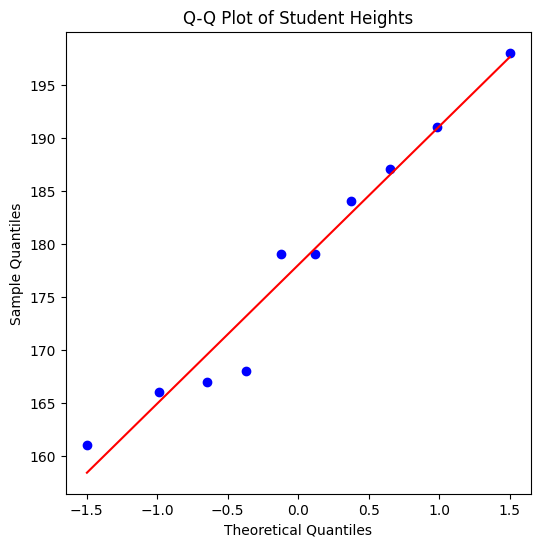

In [6]:
# In Python, you can use scipy.stats.probplot() to create the Q-Q plot and plot the Q-Q line:

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Data
x = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])
x_sorted = sorted(x)

# Standardize the data (optional step)
x_standardized = (x_sorted - np.mean(x)) / np.std(x)

print("Height data: ", x_sorted)
print ("Z-score of each of the height data:", x_standardized)

# Plotting the Q-Q plot
fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(x, dist="norm", plot=ax)

#probplot() returns osm and osr: Ordered sample and theoretical quantiles.When plot=ax is provided, it generates a Q-Q plot using matplotlib

plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("Q-Q Plot of Student Heights")
plt.show()

The simplest observations in a Q-Q plot before conducting a hypothesis test using a small dataset are:

1. **Linearity of Points**: Check if the points fall approximately along a straight line. This indicates that the data is consistent with the theoretical distribution (e.g., normal).

2. **Systematic Deviations**: Look for any systematic patterns, such as curves or S-shapes, which suggest the presence of skewness in the data.

3. **Ends of the Plot**: Observe if the points at the ends deviate significantly from the line, indicating heavy tails or kurtosis (extreme values more frequent than expected).

4. **Outliers**: Identify any points that fall far away from the reference line, which could be potential outliers in the dataset.

These basic observations help determine if the data distribution is approximately normal or has deviations that should be considered before performing hypothesis testing.

### Summary
1. **Sort the data**.
2. **Calculate the empirical probabilities**.
3. **Find theoretical quantiles** using the normal distribution's quantile function.
4. **Plot the data quantiles vs. the theoretical quantiles**.
5. **Check the Q-Q line** to see if the data is approximately normally distributed.

This manual process helps in understanding each step involved in constructing a Q-Q plot, giving you insights into the distribution of your data.

In [7]:
np.random.seed(24)

In [8]:
# (repeat this cell many times)
data = stats.norm.rvs(mu, sigma, size=n) # Again, generate the random normal data
plt.ecdf(data)
plt.plot(np.arange(70,130,1), stats.norm.cdf(np.arange(70,130,1), loc=mu, scale=sigma))
plt.show()
# It should roughly follow the "perfect" normal distribution

AttributeError: module 'matplotlib.pyplot' has no attribute 'ecdf'

In [ ]:
np.random.seed(24)

In [ ]:
# import statsmodels.api to do automated q-q-plot
import statsmodels.api as sm

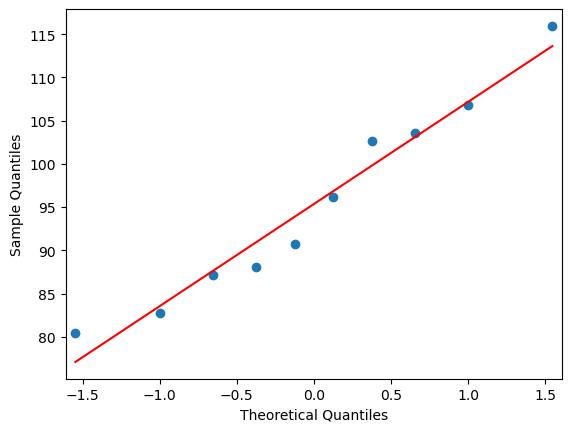

In [ ]:
# (repeat this cell many times). Sometimes it does not look great, because of the small sample size combined with randomness!
data = stats.norm.rvs(mu, sigma, size=n)
sm.qqplot(data,line="q",a=3/8) 
# OBS: "a = 3/8" is preferred for n <= 10 
#     ("a = 1/2" is preferred for n >  10)  
plt.show()

Now try larger samples:

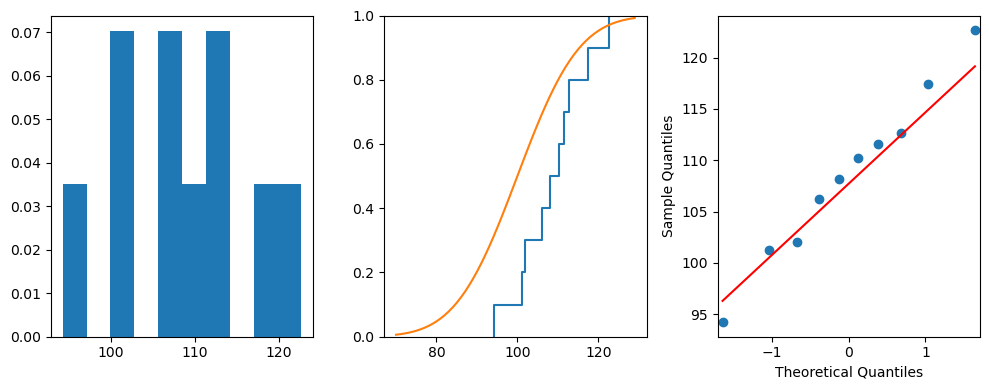

In [ ]:
# (repeat this cell many times - then increase n and repeat again)
n=10 # also try n = 100
data = stats.norm.rvs(mu, sigma, size=n)
fig, axs = plt.subplots(1, 3, figsize=(10,4))
axs[0].hist(data, density=True) # plot 1) - histogram
axs[1].ecdf(data) # plot 2) - Empirical CDF
axs[1].plot(np.arange(70,130,1), stats.norm.cdf(np.arange(70,130,1), loc=mu, scale=sigma))
sm.qqplot(data,line="q",a=1/2,ax=axs[2]) # plot 3) - Q-Q plot

plt.tight_layout()
plt.show()

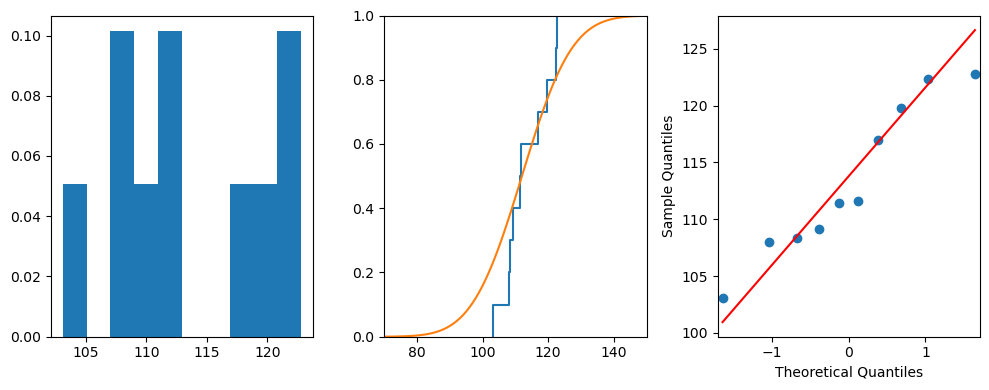

In [ ]:
# examples with exponentially distributed data:

n=10 # also try n = 100
data = stats.expon.rvs(mu, sigma, size=n) # Not normal random data anymore
fig, axs = plt.subplots(1, 3, figsize=(10,4))
axs[0].hist(data, density=True)
axs[1].ecdf(data)
axs[1].plot(np.arange(70,150,1), stats.norm.cdf(np.arange(70,150,1), loc=stats.expon.mean(loc=mu, scale=sigma), scale=stats.expon.std(loc=mu, scale=sigma)))
axs[1].set_xlim(70,150)
sm.qqplot(data,line="q",a=1/2,ax=axs[2])

plt.tight_layout()
plt.show()

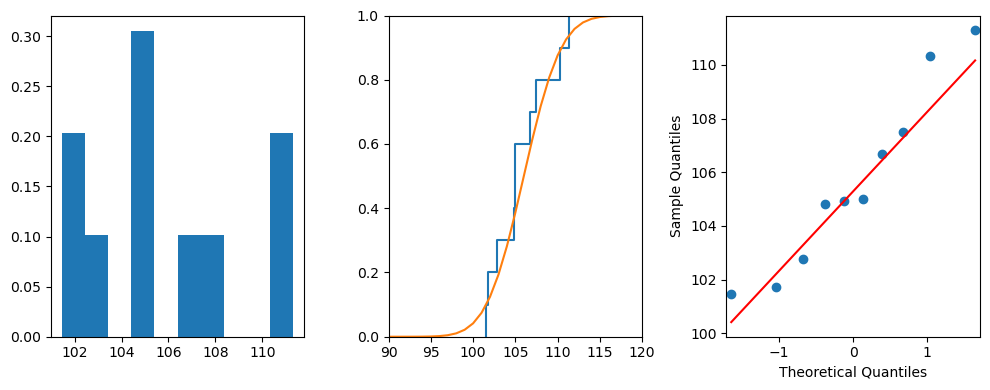

In [ ]:
# examples with uniformly distributed data:

n=10 # also try n = 100
data = stats.uniform.rvs(mu, sigma, size=n)
fig, axs = plt.subplots(1, 3, figsize=(10,4))
axs[0].hist(data, density=True)
axs[1].ecdf(data)
axs[1].plot(np.arange(90,120,1), stats.norm.cdf(np.arange(90,120,1), loc=stats.uniform.mean(loc=mu, scale=sigma), scale=stats.uniform.std(loc=mu, scale=sigma)))
axs[1].set_xlim(90,120)
sm.qqplot(data,line="q",a=1/2,ax=axs[2])

plt.tight_layout()
plt.show()

### Example: Voltage drop

[ 0.75 -0.85  4.23  2.12  3.04  0.53 -0.35  1.69  1.52 -0.42]
10


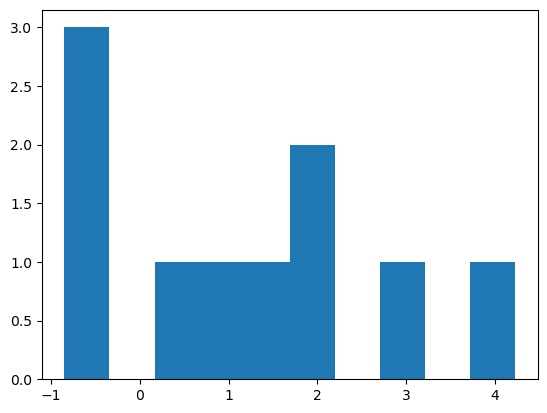

In [ ]:
# Enter data
x = np.array([0.75,-0.85,4.23,2.12,3.04,0.53,-0.35,1.69,1.52,-0.42])
n = len(x)
print(x)
print(n)
# Histogram
plt.hist(x)
plt.show()

In [ ]:
# Compute best estimate for the mean (and the standard error)
mean_hat = x.mean()
se_mean = x.std(ddof=1)/np.sqrt(n)
print([mean_hat, x.std(ddof=1), se_mean])

[1.226, 1.6203374134214559, 0.5123956804397685]


In [ ]:
# confidence interval for the mean: (manually)
mu_lower = mean_hat - stats.t.ppf(0.975, df=9)*se_mean
mu_upper = mean_hat + stats.t.ppf(0.975, df=9)*se_mean
print([mu_lower, mu_upper])

[0.06688044127767756, 2.385119558722322]


In [ ]:
# Define the null hypothesis
mean_null_hyp = 0

In [ ]:
# Compute the "test statistic" from the oberserved data
tobs = (mean_hat - mean_null_hyp) / se_mean
print(tobs)

2.3926821532682983


In [ ]:
# compare with t_0.975 from t-distribution with df = 9
t_criticial = stats.t.ppf(0.975, df=n-1)
print(t_criticial)

2.2621571628540993


In [ ]:
p_value= 2*stats.t.cdf(-tobs, df=n-1)
print(p_value)

0.04037944695746913


In [ ]:
# You can also use the ttest_1samp funtion from scipy.stats:
print(stats.ttest_1samp(x, popmean=0))

TtestResult(statistic=2.3926821532682974, pvalue=0.04037944695746921, df=9)


### Example: Difference in calorie-intake

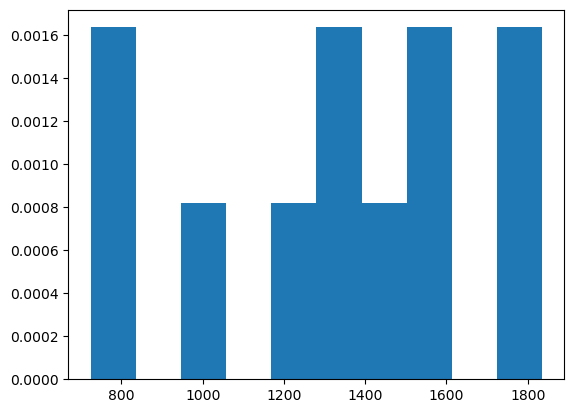

In [ ]:
# Plot histogram of data
x = np.array([1350, 1250, 1755, 1020, 745, 1835, 1540, 1540, 725, 1330, 1435])
plt.hist(x, density=True)
plt.show()

How well does the data actually follow a normal distribution? <br>

How well can we expect 11 obervations to "look" like a normal distribution?

In [ ]:
# calculate mean and SEM (Standard Error of the Mean)
xbar = x.mean()
n = 11
SEM = x.std(ddof=1)/np.sqrt(n)
print(xbar, SEM)

1320.4545454545455 110.57793332687574


In [ ]:
# calculate t_obs
t_obs = (xbar-0)/SEM
print(t_obs)

11.941392877647603


We can already now see that t_obs is very large

In [ ]:
# calculate p-value
pval = 2*stats.t.cdf(-t_obs,df=n-1)
print(pval)

3.059020942934875e-07


p-value is smaller than 0.05 (and also smaller than 0.001).
So we reject the nulhypothesis 

In [ ]:
# we could also calculate the 95% conficence interval for the mean
mu_lower = xbar - stats.t.ppf(0.975,df=n-1)*SEM
mu_upper = xbar + stats.t.ppf(0.975,df=n-1)*SEM
print([mu_lower, mu_upper])

[1074.0715560389451, 1566.8375348701459]


Notice the confidence interval does not include the value 0

In [ ]:
# You can also use the ttest_1samp funtion from scipy.stats:
print(stats.ttest_1samp(x, popmean=0))